In [1]:
def answer(src,dest):
    
# Create the matrix
    matrix = [[0 for i in range(8)] for j in range(8)]
    total = range(64)
    for row in range(8):
        matrix[row] = total[row*8:(row*8+8)]

# Function to get position coordinates of a given point in matrix
    def pos_index(pos):
        return [(i, row.index(pos)) for i, row in enumerate(matrix) if pos in row]  
    
# Differences from start point for all theoretical moves
    move_diffs = [-17, -15, -10, -6, 6, 10, 15, 17]

# All theoretical moves from given start point
    def theoretical_moves(start_pos):
        return [i for i in sorted([start_pos - i for i in move_diffs]) if i>=0 and i<=63]

# Absolute distances from starting position
    def absolute_distances(start_pos):
        theo_moves = theoretical_moves(start_pos)
        return [((pos_index(start_pos)[0][0] - pos_index(index)[0][0]),
                 (pos_index(start_pos)[0][1] - pos_index(index)[0][1]))
                for index in theo_moves]

# Distance sums from start pos
    def distance_sums(start_pos):
        abs_distances = absolute_distances(start_pos)
        return [sum(abs_distances[i]) for i in range(len(abs_distances))]

# Actual moves available for given start point
    def actual_moves(start_pos):
        actual_moves = []
        dist_sums = distance_sums(start_pos)
        theo_moves = theoretical_moves(start_pos)
        for i in range(len(dist_sums)):
            if (dist_sums[i]<=3 and dist_sums[i]>=-3):
                actual_moves.append(theo_moves[i])
        return actual_moves

# Shortest number of moves until dest reached - all paths considered in each 'generation' of moves until dest found
    result, found = 1, False
    this_gen_input = actual_moves(src)
    while found == False:
        next_gen_input = []
        if dest in this_gen_input:
            return result
            found = True
        else:
            for i in this_gen_input:
                for pos in actual_moves(i):
                    next_gen_input.append(pos)
            result +=1
            this_gen_input = next_gen_input

In [2]:
src = 55
dest = 4
answer(src,dest)

3

Test cases

Inputs:
    (int) src = 19
    (int) dest = 36
Output:
    (int) 1

Inputs:
    (int) src = 0
    (int) dest = 1
Output:
    (int) 3

In [3]:
test_case_1 = ['Test case 1:', 19, 36, 1]
test_case_2 = ['Test case 2:', 0, 1, 3]
for test in (test_case_1, test_case_2):
    if answer(test[1], test[2]) == test[3]:
        print test[0], 'passed!'
    else:
        print test[0], 'FAIL!'

Test case 1: passed!
Test case 2: passed!


### Analysis of distribution of number of moves from all possible combinations of src-dest points

In [4]:
srcs = range(64)
dests = range(64)

In [5]:
combos = []
for i in srcs:
    for j in dests:
        if j>i:
            combos.append((i,j))
print 'Total number unique \'src\'-\'dest\' combinations =',len(combos)
print '(Not including starting and ending on same point, or reverses of \'src\'-\'dest\' combination.)'

Total number unique 'src'-'dest' combinations = 2016
(Not including starting and ending on same point, or reverses of 'src'-'dest' combination.)


In [6]:
distances = []
for i in range(len(combos)):
    distance = answer(combos[i][0],combos[i][1])
    distances.append(distance)

In [7]:
# Generate data
number_moves = range(1,len(distances)+1,1)
distance_counts = [distances.count(move) for move in number_moves]

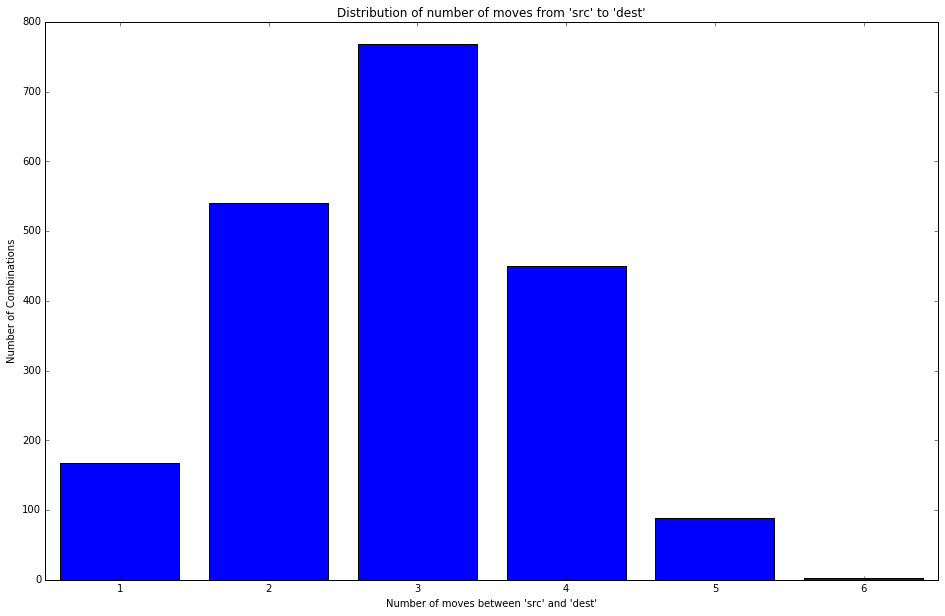

In [8]:
# Generate chart
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (16,10))
plt.bar(number_moves, distance_counts, align = 'center')
plt.title('Distribution of number of moves from \'src\' to \'dest\'')
plt.ylabel('Number of Combinations')
plt.xlabel('Number of moves between \'src\' and \'dest\'')
plt.axis([0.5, 6.5, 0, 800])
plt.show()